In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

myecdf(A, x) = count(≤(x), A) / length(A)

myecdf (generic function with 1 method)

In [2]:
function tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    (x̄ - ȳ - Δμ) / √(sx²/m + sy²/n)
end

function tvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function degree_of_freedom_welch(m, sx², n, sy²)
    (sx²/m + sy²/n)^2 / ((sx²/m)^2/(m-1) + (sy²/n)^2/(n-1))
end

function degree_of_freedom_welch(x, y)
    m, sx² = length(x), var(x)
    n, sy² = length(y), var(y)
    degree_of_freedom_welch(m, sx², n, sy²)
end

function pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    t = tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    2ccdf(TDist(ν), abs(t))
end

function pvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    c = quantile(TDist(ν), 1-α/2)
    SEhat = √(sx²/m + sy²/n)
    [x̄-ȳ-c*SEhat, x̄-ȳ+c*SEhat]
end

function confint_welch(x, y; α=0.05)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    confint_welch(m, x̄, sx², n, ȳ, sy²; α)
end

confint_welch (generic function with 2 methods)

In [3]:
s²_student(m, sx², n, sy²) = ((m-1)*sx² + (n-1)*sy²)/(m+n-2)

function tvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    s² = s²_student(m, sx², n, sy²)
    (x̄ - ȳ - Δμ) / √(s²*(1/m + 1/n))
end

function tvalue_student(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    tvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function pvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    t = tvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ)
    2ccdf(TDist(m+n-2), abs(t))
end

function pvalue_student(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    pvalue_student(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function confint_student(m, x̄, sx², n, ȳ, sy²; α=0.05)
    c = quantile(TDist(m+n-2), 1-α/2)
    s² = s²_student(m, sx², n, sy²)
    SEhat = √(s²*(1/m + 1/n))
    [x̄-ȳ-c*SEhat, x̄-ȳ+c*SEhat]
end

function confint_student(x, y; α=0.05)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    confint_student(m, x̄, sx², n, ȳ, sy²; α)
end

confint_student (generic function with 2 methods)

In [4]:
function sim(;
        m = 11, μx = 78.91, σx = 8.42,
        n = 11, μy = 76.82, σy = 7.41,
        L = 10^6
    )
    distx = Normal(μx, σx)
    disty = Normal(μy, σy)
    Xtmp = zeros(m)
    Ytmp = zeros(n)
    pval_w = zeros(L)
    pval_s = zeros(L)
    for i in 1:L
        X = rand!(distx, Xtmp)
        Y = rand!(disty, Ytmp)
        pval_w[i] = pvalue_welch(X, Y)
        pval_s[i] = pvalue_student(X, Y)
    end
    pval_w, pval_s
end

sim (generic function with 1 method)

In [5]:
m, x̄, sx² = 11, 78.91, 8.42^2
n, ȳ, sy² = 11, 76.82, 7.41^2
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²);
@show confint_welch(m, x̄, sx², n, ȳ, sy²);
@show pvalue_student(m, x̄, sx², n, ȳ, sy²);
@show confint_student(m, x̄, sx², n, ȳ, sy²);
@show hedges_g = abs(x̄-ȳ) / √(((m-1)*sx²+(n-1)*sy²)/(m+n-2));

pvalue_welch(m, x̄, sx², n, ȳ, sy²) = 0.5436553049850137
confint_welch(m, x̄, sx², n, ȳ, sy²) = [-4.971684747049532, 9.15168474704954]
pvalue_student(m, x̄, sx², n, ȳ, sy²) = 0.5435437293216695
confint_student(m, x̄, sx², n, ȳ, sy²) = [-4.9643733264265935, 9.1443733264266]
hedges_g = abs(x̄ - ȳ) / √(((m - 1) * sx² + (n - 1) * sy²) / ((m + n) - 2)) = 0.2635197658529982


In [6]:
m, x̄, sx² = 228, 78.91, 8.42^2
n, ȳ, sy² = 228, 76.82, 7.41^2
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²);
@show confint_welch(m, x̄, sx², n, ȳ, sy²);
@show pvalue_student(m, x̄, sx², n, ȳ, sy²);
@show confint_student(m, x̄, sx², n, ȳ, sy²);
@show hedges_g = abs(x̄-ȳ) / √(((m-1)*sx²+(n-1)*sy²)/(m+n-2));

pvalue_welch(m, x̄, sx², n, ȳ, sy²) = 0.0051148351561078045
confint_welch(m, x̄, sx², n, ȳ, sy²) = [0.6301547330561403, 3.5498452669438665]
pvalue_student(m, x̄, sx², n, ȳ, sy²) = 0.00511136456269382
confint_student(m, x̄, sx², n, ȳ, sy²) = [0.6302177557422217, 3.549782244257785]
hedges_g = abs(x̄ - ȳ) / √(((m - 1) * sx² + (n - 1) * sy²) / ((m + n) - 2)) = 0.2635197658529982


(m, n) = (11, 11)
myecdf(pval_w, 0.05) = 0.088939
myecdf(pval_s, 0.05) = 0.090964
(m, n) = (228, 228)
myecdf(pval_w, 0.05) = 0.801108
myecdf(pval_s, 0.05) = 0.80113


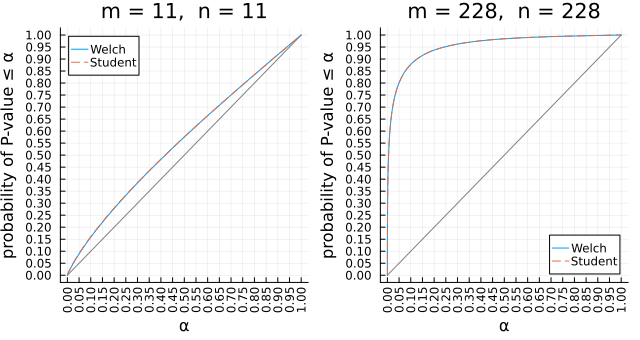

In [7]:
m = n = 11
pval_w, pval_s = sim(; m, n)
@show m, n
@show myecdf(pval_w, 0.05)
@show myecdf(pval_s, 0.05)
P = plot(α -> myecdf(pval_w, α), 0, 1; label="Welch")
plot!(α -> myecdf(pval_s, α), 0, 1; label="Student", ls=:dash)
plot!(identity; label="", c=:gray)
plot!(xtick=0:0.05:1, ytick=0:0.05:1, xrotation=90)
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("m = $m,  n = $n")

m = n = 228
pval_w, pval_s = sim(; m, n)
@show m, n
@show myecdf(pval_w, 0.05)
@show myecdf(pval_s, 0.05)
Q = plot(α -> myecdf(pval_w, α), 0, 1; label="Welch")
plot!(α -> myecdf(pval_s, α), 0, 1; label="Student", ls=:dash)
plot!(identity; label="", c=:gray)
plot!(xtick=0:0.05:1, ytick=0:0.05:1, xrotation=90)
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("m = $m,  n = $n")

plot(P, Q; size=(640, 340), bottommargin=4Plots.mm)